In [1]:
import numpy as np
import pandas as pd
import yfinance as yf      
import matplotlib.pyplot as plt
import math
from statsmodels.tsa.stattools import adfuller

## Generate Data

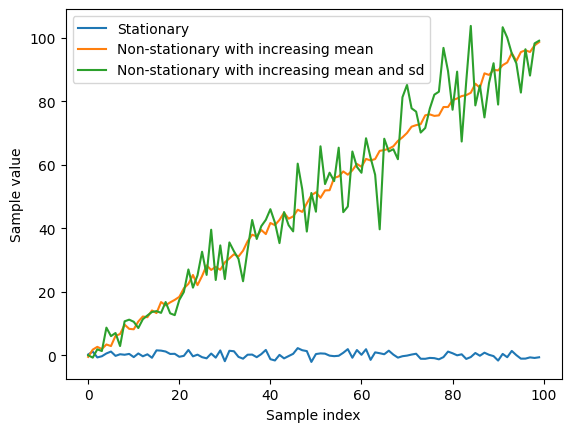

In [ ]:
def generate_normal_sample(params):         
    """
    input: params, including mean in params[0] and standard deviation in params[1]
    output: a random sample from the normal distribution parameterized by the input         
    """
    mean = params[0]
    sd = params[1]
    return np.random.normal(mean, sd)


T = 100  
stationary_list, nonstationary_list1, nonstationary_list2 = [], [], []
          
for i in range(T): 
    # generate a stationary sample and append to list     
    stationary_list.append(generate_normal_sample([0,1]))
  
    # generate a non-stationary sample with an increasing mean and append to list  
    nonstationary_list1.append(generate_normal_sample([i,1]))
         
    # # generate a non-stationary sample with an increasing mean and sd and append to list    
    nonstationary_list2.append(generate_normal_sample([i,np.sqrt(i)]))

                        
x = range(T)
          
# plot the lists as line plots with labels for each line          
plt.plot(x, stationary_list, label='Stationary')         
plt.plot(x, nonstationary_list1, label='Non-stationary with increasing mean')          
plt.plot(x, nonstationary_list2, label='Non-stationary with increasing mean and sd')
                
# set the axis labels         
plt.xlabel('Sample index')            
plt.ylabel('Sample value')

# add a legend         
plt.legend()

# show the plot         
plt.show()

## Stationarity Test with ADF

```math
\begin{align}
\Delta y_t &= a + py_{t-1}+\sum_{i=1}^{t-1}(\phi_i\Delta Y_{t-i})+e_t
\end{align}
```
a=1

In [4]:
def stationarity_test(x, threshold=0.05):       
    """            
    input:         
    x: a list of scalar values      
    threshold: significance level
    output: print out message on stationarity
    """
        
    pvalue = adfuller(x)[1]

                
    if pvalue < threshold:        
        return 'p-value is ' + str(pvalue) + '. The series is likely stationary.'
    else:
        return 'p-value is ' + str(pvalue) + '. The series is likely non-stationary.'


print(stationarity_test(stationary_list))                
print(stationarity_test(nonstationary_list1))
print(stationarity_test(nonstationary_list2))

p-value is 1.155637161435077e-16. The series is likely stationary.
p-value is 0.9266167109228747. The series is likely non-stationary.
p-value is 0.8518865539542495. The series is likely non-stationary.


# Pair Trading

In [ ]:
import os   
import random
import numpy as np
import yfinance as yf
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm
from matplotlib import pyplot as plt
%matplotlib inline

### Reference 

1. [link1](https://zhuanlan.zhihu.com/p/21566798)
1. [link2](https://www.heywhale.com/mw/project/6593c8367f7f3f8921363d60)